<a href="https://colab.research.google.com/github/jiw3026/DL_NLP_CODE/blob/main/02_RNN(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.11.0'

# Keras로 RNN 구현하기

- Keras RNN : https://keras.io/api/layers/recurrent_layers/simple_rnn/

In [ ]:
inputs = np.random.random([1, 10, 8]).astype(np.float32)
inputs.shape

(1, 10, 8)

In [ ]:
rnn = tf.keras.layers.SimpleRNN(4, return_sequences = True, return_state = True)
rnn(inputs)

[<tf.Tensor: shape=(1, 10, 4), dtype=float32, numpy=
 array([[[ 0.7919119 ,  0.83175945, -0.10131297,  0.4329604 ],
         [-0.16240579,  0.69061756, -0.40612257,  0.27560082],
         [ 0.6552654 ,  0.81798583, -0.3229329 , -0.17169493],
         [-0.12616147,  0.16641787,  0.16092737,  0.19727162],
         [ 0.7826369 ,  0.9186076 , -0.30106527,  0.20251445],
         [-0.19963399,  0.29174912, -0.2474147 , -0.13887751],
         [ 0.9446834 ,  0.97612375,  0.27305   ,  0.2440126 ],
         [ 0.14211522,  0.6551266 , -0.6829709 ,  0.5387665 ],
         [ 0.38992915,  0.918588  ,  0.0630033 ,  0.11304153],
         [ 0.26087964,  0.70651495, -0.47920412,  0.2557625 ]]],
       dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[ 0.26087964,  0.70651495, -0.47920412,  0.2557625 ]],
       dtype=float32)>]

### 1. 단층 Simple RNN

우선 RNN과 LSTM을 테스트하기 위한 임의의 입력을 만듭니다.

["John loves cats", "John loves dogs"] -> [[S, V, O], [S, V, O]]

In [ ]:
# 단어 벡터
John = [1,0,0,0]
loves = [0,1,0,0]
cats = [0,0,1,0]
dogs = [0,0,0,1]

In [ ]:
# X 데이터

train_X = np.array([
    [ John, loves, cats ],
    [ John, loves, dogs ]
]).astype(np.float32)
train_X

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]], dtype=float32)

In [ ]:
# 타겟 벡터

S = [0] # subject
V = [1] # verb
O = [2] # object

idx2tag = ['S', 'V', 'O']

In [ ]:
# Y 데이터
train_Y = np.array([[S, V, O], [S, V, O]]).astype(np.float32)

print("train_y", train_Y)
print("train_X의 shape", train_X.shape)
print("train_Y의 shape", train_Y.shape)

train_y [[[0.]
  [1.]
  [2.]]

 [[0.]
  [1.]
  [2.]]]
train_X의 shape (2, 3, 4)
train_Y의 shape (2, 3, 1)


- 단어 벡터의 차원은? 
- 문장의 길이는? 
- output 클래스 개수는? 

위 입력은 단어 벡터의 차원은 4이고, 문장의 길이가 3인 경우를 가정한 입력입니다. 
다시 말해 3번의 시점(timesteps)이 존재하고, 각 시점마다 4차원의 단어 벡터가 입력으로 사용됩니다. 
     
그런데 RNN은 2D 텐서가 아니라 3D 텐서를 입력을 받습니다 -> (batchsize, timesteps, features)  = (batchsize, timesteps, input_dim)  
즉, 배치크기 2로 설정하여 입력합니다. 

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(
    tf.keras.layers.SimpleRNN(2, input_shape = (3, 4), return_sequences = True, name = 'SimpleRNN-1')
    )
model.add(
    tf.keras.layers.Dense(3, activation = 'softmax', name = 'ouput')
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SimpleRNN-1 (SimpleRNN)     (None, 3, 2)              14        
                                                                 
 ouput (Dense)               (None, 3, 3)              9         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam', 
    metrics = ['acc']
)

In [ ]:
model.fit(train_X, train_Y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 1.0793 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0779 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 23ms/step - loss: 1.0765 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 19ms/step - loss: 1.0751 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0737 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 1.0723 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0709 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 1.0695 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 1.0681 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 16ms/step - loss: 1.0667 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - loss

KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict(train_X)
predictions

1/1 [==============================] - 0s 275ms/step


array([[[0.59470373, 0.19380789, 0.21148832],
        [0.19740811, 0.46417198, 0.3384199 ],
        [0.20044363, 0.33431312, 0.46524316]],

       [[0.59470373, 0.19380789, 0.21148832],
        [0.19740811, 0.46417198, 0.3384199 ],
        [0.21202403, 0.3485259 , 0.4394501 ]]], dtype=float32)

In [ ]:
predictions = model.predict(train_X)


for i, prediction in enumerate(predictions):
    print(prediction)
    print(np.argmax(prediction, axis=1))

    result_str = [idx2tag[c] for c in np.argmax(prediction, axis=1) ]
    
    print("\tPrediction str: ", "".join(result_str), end = '\n\n\n')


1/1 [==============================] - 0s 37ms/step
[[0.59470373 0.19380789 0.21148832]
 [0.19740811 0.46417198 0.3384199 ]
 [0.20044363 0.33431312 0.46524316]]
[0 1 2]
	Prediction str:  SVO


[[0.59470373 0.19380789 0.21148832]
 [0.19740811 0.46417198 0.3384199 ]
 [0.21202403 0.3485259  0.4394501 ]]
[0 1 2]
	Prediction str:  SVO




모델을 이해하려면 weight 개수(W0\~Wn)를 세어봐야 합니다.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SimpleRNN-1 (SimpleRNN)     (None, 3, 2)              14        
                                                                 
 ouput (Dense)               (None, 3, 3)              9         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


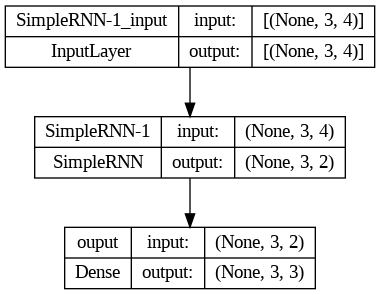

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

- Wx = 3x4
- Wh = 3x3
- bias(hidden) = 3x1
- Wy = 3x3
- bias(output) = 3x1 

실제로 weight의 개수를 확인해봅시다. 

In [ ]:
model.weights

[<tf.Variable 'SimpleRNN-1/simple_rnn_cell_7/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-1.2507132 , -0.63569826],
        [-0.20641887, -0.41043052],
        [ 0.41281486, -1.2374388 ],
        [ 0.37984928, -0.17507944]], dtype=float32)>,
 <tf.Variable 'SimpleRNN-1/simple_rnn_cell_7/recurrent_kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.2139053, -1.012901 ],
        [-1.3190962,  0.4500338]], dtype=float32)>,
 <tf.Variable 'SimpleRNN-1/simple_rnn_cell_7/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.20854996, -0.22946334], dtype=float32)>,
 <tf.Variable 'ouput/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-1.3662667 , -0.14649557, -0.1329394 ],
        [ 0.4104558 ,  0.51143575, -0.28261477]], dtype=float32)>,
 <tf.Variable 'ouput/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.27713183,  0.17639737, -0.28071147], dtype=float32)>]

In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)

SimpleRNN-1/simple_rnn_cell_7/kernel:0 => (4, 2)
SimpleRNN-1/simple_rnn_cell_7/recurrent_kernel:0 => (2, 2)
SimpleRNN-1/simple_rnn_cell_7/bias:0 => (2,)
ouput/kernel:0 => (2, 3)
ouput/bias:0 => (3,)


# Keras RNN 이해하기

RNN의 input, output, weight을 이해해봅시다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense

### 문제1

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Wx : 10*5 
Wh : 5*5 
b : 5*1 

모델 summary를 보고 생각해봅시다. 
- input은 어떤 모양인가요? 
- output은 어떤 모양인가요? 

### 문제2

In [ ]:
model = Sequential()
# The output of RNN will be a 3D tensor of shape (batch_size, input_dim)
model.add(SimpleRNN(5, batch_input_shape=(8,2,10)))
model.summary()

### 문제3

- 중간 hidden state를 모두 리턴하는 return_sequences를 True로 설정합니다. 

In [ ]:
model = Sequential()

# The output of RNN will be a 3D tensor of shape (batch_size, timesteps, input_dim)
model.add(SimpleRNN(5, input_dim=10, return_sequences=True))
model.summary()

무엇이 달라졌나요? 

이번엔 파라미터의 개수를 세어보세요. 어떻게 계산하나요? 

- Wxh = 
- Whh = 
- bias(hidden)  =

### 문제4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(7, input_shape=(100,5), return_sequences = True))
model.add(SimpleRNN(3))
model.add(Dense(2))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 100, 7)            91        
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 3)                 33        
                                                                 
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


위의 summary를 보고 직접 계산해보세요

Wx =   
Wh =  
bh = 

### 문제5

output layer를 추가하겠습니다. 

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, input_shape = (2, 10)))
model.add(Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


이번에는 파라미터 개수가 몇 개인가요? 

In [ ]:
Wyht + b = y 

- Wx = 5*10
- Wh = 5*5
- bias(hidden) = 5*1
- Wy = 1*5
- bias(output) = 1*1  

### 2. 다층 Simple RNN

임의의 시계열 데이터를 생성하겠습니다. 

In [ ]:
import numpy as np

data = np.sin(2*np.pi*np.arange(0, 1000))*10 + np.random.random(1000)
data.shape

(1000,)

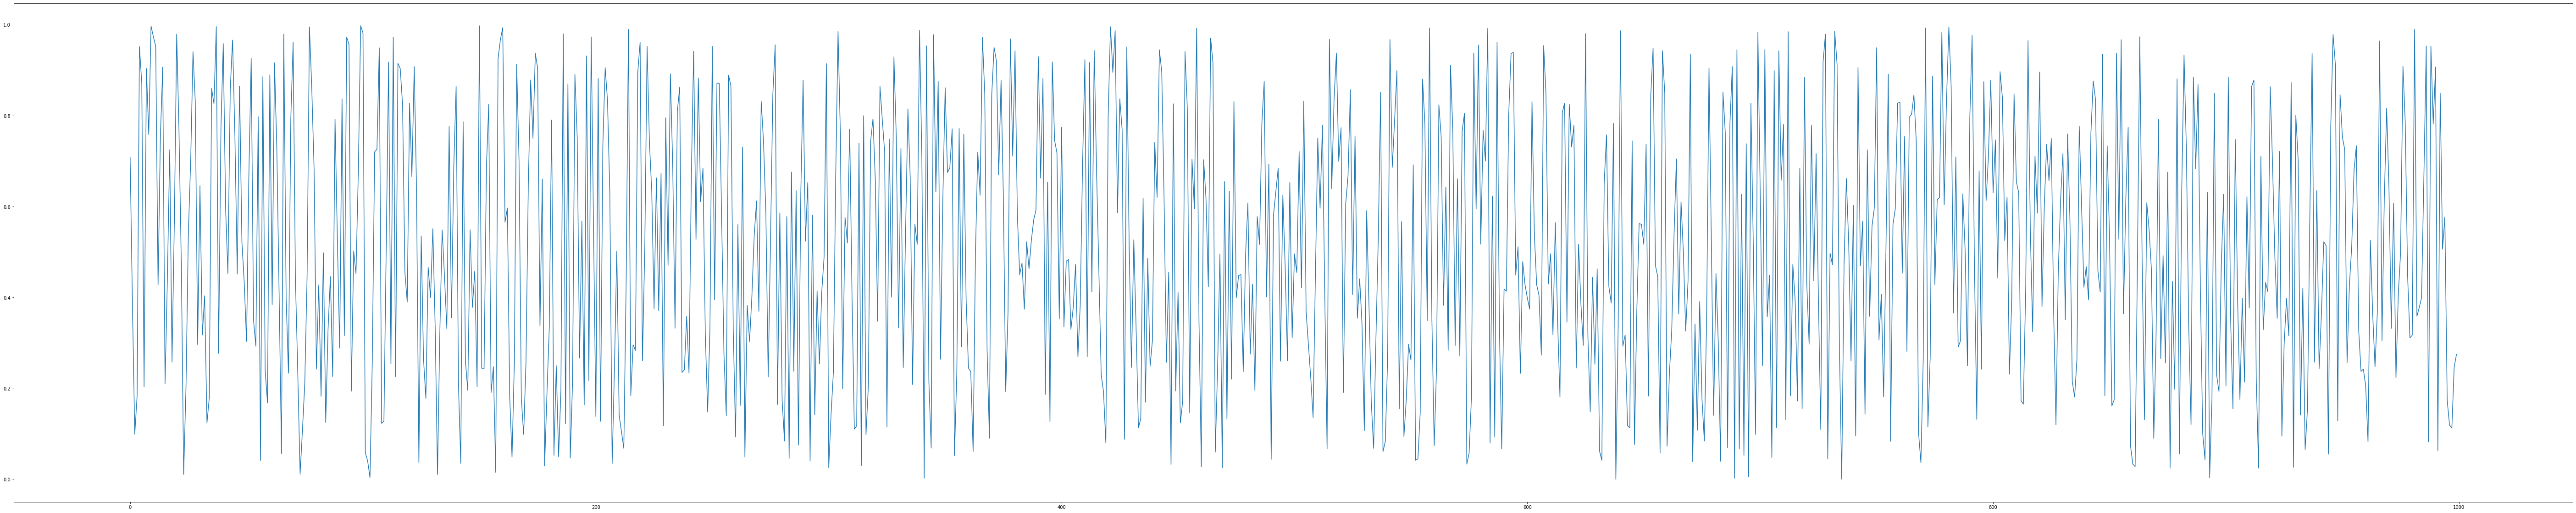

In [ ]:
plt.figure(figsize=[100, 20])
plt.plot(np.arange(0, 1000), data)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X, y 데이터 생성하기 

다음으로, 해당 샘플 데이터를 1칸씩 이동하며 10개씩 데이터를 잘라, x값으로 사용하고, y값은 11번째 데이터로 사용하겠습니다.  
예) x = 1번째 ~ 10번째 데이터 / y = 11번째

질문) 길이가 1000인 data를 이용해, 몇 쌍의 x, y 데이터를 만들어낼 수 있을까요?


In [ ]:
x_sin = np.array([[[data[i+j]] for j in range(10)] for i in range(len(data)-9-1)])
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, test_size=0.25, random_state=42)

In [ ]:
# shuffle = False로 명시하면, 데이터셋 순차적으로 split
x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, shuffle=False) 

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((742, 10, 1), (248, 10, 1), (742, 1))

### 모델 작성.
1. layer1: SimpleRNN 8
2. layer2: SimpleRNN 8
3. layer3: SimpleRNN 4
4. output_layer:  Dense 1 # 값이 하나 ManyToOne

In [ ]:
model = models.Sequential()

# 다층 RNN 
model.add()
model.add()
model.add()

model.add()

model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
24/24 [==============================] - 2s 8ms/step - loss: 0.9524
Epoch 2/10
24/24 [==============================] - 0s 8ms/step - loss: 0.4835
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.1874
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1254
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1116
Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1067
Epoch 7/10
24/24 [==============================] - 0s 8ms/step - loss: 0.1024
Epoch 8/10
24/24 [==============================] - 0s 7ms/step - loss: 0.0998
Epoch 9/10
24/24 [==============================] - 0s 8ms/step - loss: 0.0972
Epoch 10/10
24/24 [==============================] - 0s 8ms/step - loss: 0.0956


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn-1 (SimpleRNN)           (None, 10, 8)             80        
                                                                 
 rnn-2 (SimpleRNN)           (None, 10, 8)             136       
                                                                 
 rnn-3 (SimpleRNN)           (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


- unit: 노드의 개수 (= 아웃풋 공간의 차원) 
- (layer 1) Wx + Wh + b =
- (layer 2) Wx + Wh + b =
- (layer 3) Wx + Wh + b =


In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)

In [ ]:
model.weights

##### 학습결과

In [ ]:
y_hat = model.predict(x_test) #테스트값 예측

In [ ]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train)+len(y_hat))

plt.figure(figsize = (100,30))
# Train 데이터 그래프로 표현
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o')
plt.plot(y_2_axis, y_hat.reshape(len(x_test),),'-o', color = 'red', label = 'predicted')
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color = 'purple', alpha = 0.3, label = 'actual')
plt.legend(fontsize = 40)
plt.show()

### reference

- https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/08.%20RNN/8-4.%20understanding_simplernn_and_lstm.ipynb